In [10]:
# performing linear algebra
import numpy as np 
  
# data processing
import pandas as pd
  
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [4]:
#drive mounting
drive.mount('/content/drive/')

#read CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
  
print (data.head)

<bound method NDFrame.head of            id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.drop(['Unnamed: 32', 'id'], axis = 1)
print(df.shape)

(569, 32)


In [8]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
  
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

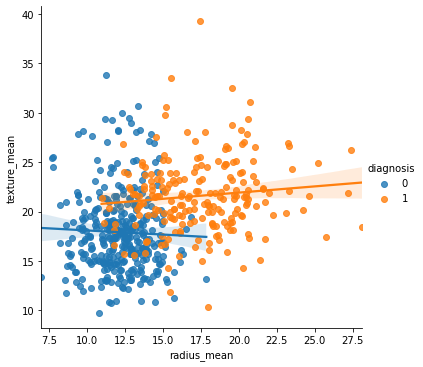

In [11]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

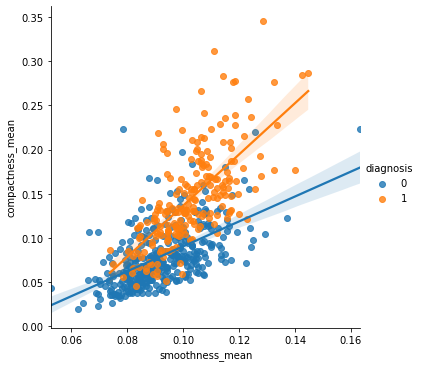

In [12]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
           data = df, hue = 'diagnosis')

In [13]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9627659574468085

In [19]:
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  13 


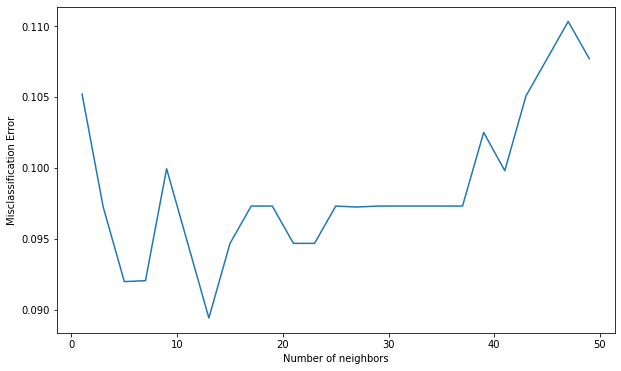

In [21]:
MSE = [1-x for x in cv_scores]
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()